Simulate some trials of silhouettes based on biased occurance probs for BBs. These silhouettes will only have one solution.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

## Helper functions

In [2]:
#@title Helper functions for plotting

def mkPlot_subplots_LinIdx(form_linIdx,n_grid=20,n_grid_reduced=10,title='Stim ',cols=3,rows=3):

  # uses linear indexing

  fig = plt.figure() 

  for idx_BB in np.arange(np.size(form_linIdx,0)):

    BB = np.zeros((n_grid,n_grid))
    BB[np.unravel_index(form_linIdx[idx_BB], (n_grid,n_grid), order='F')] = 1 

    fig.add_subplot(cols, rows, idx_BB+1)

    plt.imshow(mkReduceGrid(BB,n_grid_reduced), cmap='Greys')
    plt.axis('off')
    plt.title(title + str(idx_BB))

  plt.show()

def mkPlot_subplots(form_matrix,plot_idx,n_grid_reduced=10,title='Stim ',cols=5,rows=5):
  
  # uses matrix code

  fig = plt.figure() 

  fig_count = 1;
  
  for idx_BB in plot_idx:

    BB = form_matrix[idx_BB,:,:]

    fig.add_subplot(rows, cols, fig_count)

    plt.imshow(mkReduceGrid(BB,n_grid_reduced), cmap='Greys')
    plt.axis('off')
    plt.title(title + str(idx_BB))

    fig_count += 1

    # print(coord_Blocks[:,:,idx_BB])

  plt.show()


def mkPlot_stim(form_matrix,n_grid_reduced=10,title='Stim'):

  # uses matrix code

  plt.imshow(mkReduceGrid(form_matrix,n_grid_reduced), cmap='Greys')
  plt.axis('off')
  plt.title(title)
  plt.show()

In [3]:
#@title Helper function crop silhouette mkCrop()
# returns form without additional padding, also size info
def mkCrop(FORM,output='reduced'):

  min_x = np.min(np.where(np.sum(FORM,axis=0)!=0))
  max_x = np.max(np.where(np.sum(FORM,axis=0)!=0))

  min_y = np.min(np.where(np.sum(FORM,axis=1)!=0))
  max_y = np.max(np.where(np.sum(FORM,axis=1)!=0))

  FORM_crop = FORM[min_y:max_y+1,min_x:max_x+1]

  range_x = max_x - min_x + 1;
  range_y = max_y - min_y + 1;

  if output == 'full':
    return FORM_crop, range_x, range_y, min_x, max_x, min_y, max_y
  elif output == 'reduced':
    return FORM_crop

In [4]:
#@title Helper function reduce grid silhouette mkReduceGrid()
# Function to reduce grid
def mkReduceGrid(FORM,n_grid_reduced):

  FORM_crop, range_x, range_y, min_x, max_x, min_y, max_y = mkCrop(FORM,'full')

  # Form_Reduced  = FORM[min_y:max_y+1+n_grid_reduced-range_y,min_x:max_x+1+n_grid_reduced-range_x]

  x_pad = (n_grid_reduced-range_x)/2
  y_pad = (n_grid_reduced-range_y)/2

  x_pad1 = int(np.floor(x_pad))
  x_pad2 = int(np.ceil(x_pad))

  y_pad1 = int(np.floor(y_pad))
  y_pad2 = int(np.ceil(y_pad))

  Form_Reduced = np.pad(FORM_crop, ((y_pad1, y_pad2), (x_pad1, x_pad2)), 'constant', constant_values=0)

  return Form_Reduced

## Basic Settings

In [5]:
# Settings for stim simulation
# n_trial_types = 3
n_trial_types = 1

# n_sim   = 210 # how many stims to simulate
# n_sim   = 180 # how many stims to simulate
n_stims_use = 30 # how many different stims per condition
n_rep_stim = 5 # rep per stimulus
n_sim   = n_stims_use*n_rep_stim*n_trial_types # how many stims to simulate

n_sim_2AFC = 60

# n_sim_minesweeper = 63
# n_sim_minesweeper = 60
n_sim_minesweeper = 45
# n_sim_minesweeper = 52
# n_sim_minesweeper = 30

do_plot = True; # plot stims and solutions

n_grid_reduced = 10 # grid size of output
n_grid         = 20 # simulate in large grid, then change to n_grid_reduced for output

n_blocks       = 4 # how many primitive blocks to use in a silhouette

# find the middle of the big grid to place the first building block
starting_point = int(n_grid**2/2-(n_grid/2))

# define different trial types
# 0 <=> silhouette consists of 2 chunks
# 1 <=> silhouette consists of 1 chunk and 2 primitive building blocks
# 2 <=> silhouette consists of 4 primitive building blocks
# trial_type = np.random.permutation(np.tile(np.array([0,1,2]), int(n_sim/3))
trial_type = np.add(np.ones((n_stims_use*n_rep_stim)),1).astype(int)
# trial_type_minesweeper = np.random.permutation(np.tile(np.array([0,1,2]), int(n_sim_minesweeper/3)))
# trial_type_minesweeper = np.random.permutation(np.tile(np.array([0,1]), int(n_sim_minesweeper/2)))
# trial_type_minesweeper = np.random.permutation(np.tile(np.array([0,0,1]), int(15)))
# trial_type_minesweeper = np.random.permutation(np.tile(np.array([0,0,0,1]), int(13)))
trial_type_minesweeper = np.zeros((int(n_sim_minesweeper))).astype(int)
# print(trial_type_minesweeper)

## Generate Building Blocks

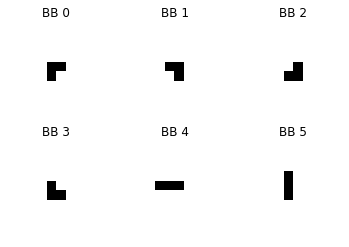

In [6]:
# define shape of primite building blocks:
form_BB = [
          [starting_point,   starting_point-1,          starting_point+(n_grid-1)],
          [starting_point-1, starting_point+(n_grid-1), starting_point+n_grid],
          [starting_point,   starting_point+n_grid,     starting_point+(n_grid-1)],
          [starting_point,   starting_point-1,          starting_point+n_grid],
          [starting_point,   starting_point+n_grid,     starting_point+n_grid*2],
          [starting_point,   starting_point-1,          starting_point-2]
          ]

if do_plot:
  mkPlot_subplots_LinIdx(form_BB,n_grid,n_grid_reduced,'BB ',2,3)

[[0. 0. 0. 0. 1. 1.]
 [0. 0. 1. 1. 0. 0.]
 [0. 1. 0. 1. 0. 1.]
 [0. 1. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [1. 0. 1. 0. 1. 0.]]


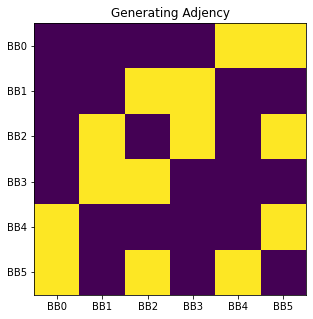

In [7]:
Adjacency = np.zeros((len(form_BB),len(form_BB)))

# Adjacency[0,[1,4,5]] = 1
# Adjacency[1,[0,3,4]] = 1
# Adjacency[2,[3,4,5]] = 1
# Adjacency[3,[1,2,4]] = 1
# Adjacency[4,[0,1,2,3,5]] = 1
# Adjacency[5,[0,2,4]] = 1

Adjacency[0,[4,5]] = 1
Adjacency[1,[2,3]] = 1
Adjacency[2,[1,3,5]] = 1
Adjacency[3,[1,2]] = 1
Adjacency[4,[0,5]] = 1
Adjacency[5,[0,2,4]] = 1

starting_set = [0,4,1,3]

# Adjacency = np.ones((len(form_BB),len(form_BB)))
# Adjacency[np.diag_indices_from(Adjacency)] = 0
# Adjacency[0,2] = 0
# Adjacency[2,0] = 0

print(Adjacency)

tick_Lab_short = ["BB0","BB1","BB2","BB3","BB4","BB5"]


plt.rcParams['figure.figsize'] = [5, 5]

plt.imshow(Adjacency)
plt.title('Generating Adjency')
plt.yticks([0,1,2,3,4,5], tick_Lab_short)
plt.xticks([0,1,2,3,4,5], tick_Lab_short)
plt.show()

# np.save("Adjacency.npy", Adjacency)
# np.save("starting_set.npy", starting_set)

## simTrial()

In [8]:
# Helper function final_Form, final_Coord = simTrial()
# 
# change this to finding all possible combinations
def simTrial(n_grid,blocks,form_block,block_code,maintain_order=False,verbose=False,):

  # Input:
  # n_grid: size of grid
  # blocks: which blocks to use, expects array and then go through sequentially
  # form_block: shape of blocks, called by 'blocks'
  # 
  # idea is to work with linear indices on grid

  n_blocks = np.size(blocks,0)

  # initialise form
  final_Form = np.zeros((n_grid,n_grid))

  # initialise coordinates
  final_Coord = np.zeros((n_grid,n_grid))
 
  #start with first building block
  current_form = np.array(form_block[blocks[0]])  

  # obtain coordinate information in reduced grid
  final_Coord[np.unravel_index(current_form, (n_grid,n_grid), order='F')] = block_code[0] # move from linear index into grid (matrix)

  #specify bounds on grid - to control we are not moving outside of grid
  up_bound    = np.arange(n_grid**2-(n_grid-1),n_grid)
  low_bound   = np.arange((n_grid-1),n_grid**2,n_grid)
  left_bound  = np.arange(n_grid)
  right_bound = np.arange(n_grid**2-n_grid,n_grid**2)

  for idx_BB in np.arange(1,np.size(blocks,0)):

    # find possible adjacent starting points for next BB
    if (maintain_order and idx_BB>1):
      adj_points = np.unique(np.array([next_block-n_grid, next_block-1, next_block+n_grid, next_block+1])) # all adjacent pixels left, ontop, right, or below
    else:
      adj_points = np.unique(np.array([current_form-n_grid, current_form-1, current_form+n_grid, current_form+1])) # all adjacent pixels left, ontop, right, or below
    adj_points = adj_points[~np.isin(adj_points,current_form)] # can't move 'into' silhouette   
    adj_points = adj_points[adj_points>=0] # can't move out of linear grid  
    adj_points = adj_points[adj_points<=n_grid**2] # can't move out of linear grid    
    
    # now try them in random order as connection points for next building block:
    adj_points = np.random.permutation(adj_points)

    built = False
    idx_adj = 0
    
    while built == False:

        # necessary because it's all randomised, ideally should go through all possible combinations
        if idx_adj==len(adj_points):
          idx_adj = 0

        # put left bottom part (random choice) of next BB onto chosen adjacent point
        # next_block = np.array(form_block[blocks[idx_BB]]) + adj_points[idx_adj] - form_block[blocks[idx_BB]][0]
        # conn_point_block = np.random.choice(len(form_block[blocks[idx_BB]]),1)
        # conn_point_block = np.random.choice(np.size(form_block[blocks[idx_BB]],0),1)
        conn_point_block = np.random.choice(form_block[blocks[idx_BB]],1)
        # next_block = np.array(form_block[blocks[idx_BB]]) + adj_points[idx_adj] - form_block[blocks[idx_BB]][int(conn_point_block)]
        next_block = np.array(form_block[blocks[idx_BB]]) + adj_points[idx_adj] - int(conn_point_block)

        # check if we didn't move 'around' grid
        if (
            all(np.isin(next_block,np.arange(0,n_grid**2))) and # did we move outside of grid?
            all(~np.isin(next_block,current_form)) and # is new BB overlapping with prev shape (can happen due to weird shapes of BBs)
            ~(any(np.isin(low_bound,next_block)) and any(np.isin(up_bound,next_block))) and # did we accidentally move from bottom to top of box (linear idx!)
            ~(any(np.isin(left_bound,next_block)) and any(np.isin(right_bound,next_block))) # did we accidentally move from left to right of box (linear idx!)
           ):
          
           current_form = np.concatenate((current_form, next_block), axis=0) # concatenate new block

           # obtain coordinate information in reduced grid
           final_Coord[np.unravel_index(next_block, (n_grid,n_grid), order='F')] = block_code[idx_BB] # move from linear index into grid (matrix)           

           if verbose:
             print('Done, it took ' + str(idx_adj+1) + ' attempts.')

           built = True
           
        else:
            
            idx_adj += 1

  final_Form[np.unravel_index(current_form, (n_grid,n_grid), order='F')] = 1 # move from linear index into grid (matrix)

  return final_Form, final_Coord#, final_Form_minesweep, final_Coord_minesweep

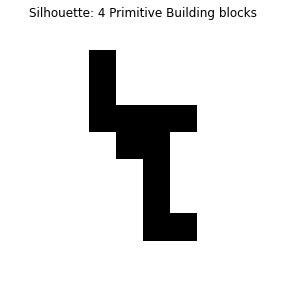

In [9]:
#@title Check some stims

# no hierarchies (4 primitive building blocks)
use_blocks = np.random.choice(np.arange(np.size(form_BB,0)), size=n_blocks, replace=False)
use_blocks = np.random.permutation(use_blocks)

block_code = [(x+1) for x in use_blocks] # +1 because 0 = background

final_Form, final_Coord = simTrial(n_grid,use_blocks,form_BB,block_code)

# final_Coord = mkReduceGrid(final_Coord,n_grid_reduced)
# print(final_Coord)
# coord_Blocks = mkCoords(final_Coord,block_code_HBB)
# print(coord_Blocks)

if do_plot:
  mkPlot_stim(final_Form,n_grid_reduced,'Silhouette: 4 Primitive Building blocks')

In [10]:
#@title Helper function overlap, size_diff, overlap, size_1, size_2 = mk_vis_overlap()

# for checking the difference in size of 2 size reduced BBs???


def mk_vis_overlap(Form_1,Form_2):
  # expects cropped forms

  size_1 = np.shape(Form_1)
  size_2 = np.shape(Form_2)

  if size_1[0]==size_2[0] and size_1[1]==size_2[1]:

    y_diff = 0
    x_diff = 0
    Form_xy = np.add(Form_1,Form_2)
    overlap = np.sum(Form_xy[Form_xy==2])/np.sum(Form_xy[Form_xy>0]) 

  else:

    y_diff = np.max([size_1[0],size_2[0]])-np.min([size_1[0],size_2[0]])
    y_pad = np.arange(0,y_diff+1)

    x_diff = np.max([size_1[1],size_2[1]])-np.min([size_1[1],size_2[1]])
    x_pad = np.arange(0,x_diff+1)

    overlap = []

    for y_move in y_pad:
      for x_move in x_pad:
        if size_1[0]<=size_2[0] and size_1[1]<=size_2[1]:
          Form_1_pad = np.pad(Form_1, ((y_move, y_diff-y_move), (0, 0)), 'constant', constant_values=0)
          Form_1_pad = np.pad(Form_1_pad, ((0, 0), (x_move, x_diff-x_move)), 'constant', constant_values=0)
          Form_2_pad = Form_2
        elif size_1[0]<=size_2[0] and size_1[1]>size_2[1]:
          Form_1_pad = np.pad(Form_1, ((y_move, y_diff-y_move), (0, 0)), 'constant', constant_values=0)
          Form_2_pad = np.pad(Form_2, ((0, 0), (x_move, x_diff-x_move)), 'constant', constant_values=0)
        elif size_1[0]>size_2[0] and size_1[1]<=size_2[1]:
          Form_1_pad = np.pad(Form_1, ((0, 0), (x_move, x_diff-x_move)), 'constant', constant_values=0)
          Form_2_pad = np.pad(Form_2, ((y_move, y_diff-y_move), (0, 0)), 'constant', constant_values=0)
        elif size_1[0]>size_2[0] and size_1[1]>size_2[1]:
          Form_1_pad = Form_1
          Form_2_pad = np.pad(Form_2, ((y_move, y_diff-y_move), (0, 0)), 'constant', constant_values=0)
          Form_2_pad = np.pad(Form_2_pad, ((0, 0), (x_move, x_diff-x_move)), 'constant', constant_values=0)

        Form_xy = np.add(Form_1_pad,Form_2_pad)

        overlap = np.append(overlap,np.sum(Form_xy[Form_xy==2])/np.sum(Form_xy[Form_xy>0]))

  overlap = np.round(overlap,2)

  # print(np.max(overlap),np.round((y_diff+x_diff)/2,2))

  # visual overlap is defined as the max overlap under all possible translations (values between 0 and 1 = identical)
  # size overlap is average size difference (0 = same size to +inf)
  return np.max(overlap), np.round((y_diff+x_diff)/2,2), overlap, size_1, size_2

In [11]:
#@title Helper function coord_Blocks, neighBours = mkCoords()

# 


# important: y is dominant, find minimum y coordinate (row), then minimum x (column) therein
def mkCoords(final_Coord,block_code_HBB,n_blocks=4,verbose=False):

  coord_Blocks = np.zeros((n_blocks, 3))

  neighBours = np.zeros((n_blocks, 6)) # number blocks x number of neighbours to the (left, ontop, right, below, total number of unique neighbours)

  neighBour_Ident = np.multiply(np.ones((n_blocks, 5)),-1) # number blocks x neighbours to the (left, ontop, right, below, total number of unique neighbours)


  if np.size(np.where(final_Coord==10))!=0: # // i don't understand this final_Coord==10 condition
    final_Coord[np.where(final_Coord==10)] = [x+1 for x in block_code_HBB[0]] # +1 because 0 = background
  if np.size(np.where(final_Coord==20))!=0: # // i don't understand this final_Coord==10 condition
    final_Coord[np.where(final_Coord==20)] = [x+1 for x in block_code_HBB[1]] # +1 because 0 = background

  unique_vals = np.unique(final_Coord)
  unique_vals = unique_vals[1:] # get rid of zero
  unique_vals = unique_vals.astype(int)

  block_count = 0
  for idx_blocks in unique_vals:

    coords_Block = np.where(final_Coord==idx_blocks)

    # print(coords_Block)

    coord_Blocks[block_count,1] = min(coords_Block[0])

    coord_Blocks[block_count,0] = min(coords_Block[1][np.where(coords_Block[0]==min(coords_Block[0]))])

    # for now, start counting coordinates at 1 - change to 0 later
    # coord_Blocks[block_count,1] = min(coords_Block[0])+1

    # coord_Blocks[block_count,0] = min(coords_Block[1][np.where(coords_Block[0]==min(coords_Block[0]))])+1

    coord_Blocks[block_count,2] = idx_blocks-1 # -1 because we had to add one to differentiate from background (annoyed smiley)

    # find neighbours - this is inefficient coding but hopefully easier to read that way
    # find neighbouring grid elements (this doesn't work if we are at the border somewhere):
    coords_Block_x = coords_Block[1]
    coords_Block_y = coords_Block[0]
    coords_Block_left  = [x-1 for x in coords_Block_x]
    coords_Block_ontop = [y-1 for y in coords_Block_y]
    coords_Block_right = [x+1 for x in coords_Block_x]
    coords_Block_below = [y+1 for y in coords_Block_y]
    
    # now find left, ontop, right, below neighbours, also keep track of overall (unique) neighbouers
    all_neighbours = []

    neighbours_left = (final_Coord[tuple([coords_Block_y,coords_Block_left])])
    neighbours_left = neighbours_left[neighbours_left!=0]
    neighbours_left = neighbours_left[neighbours_left!=idx_blocks]
    neighbours_left = np.unique(neighbours_left)
    if verbose:
      print("Building Block " + str(idx_blocks-1) + " neighbour to left: " + str(neighbours_left-1))    

    neighbours_ontop = (final_Coord[tuple([coords_Block_ontop,coords_Block_x])])
    neighbours_ontop = neighbours_ontop[neighbours_ontop!=0]
    neighbours_ontop = neighbours_ontop[neighbours_ontop!=idx_blocks]
    neighbours_ontop = np.unique(neighbours_ontop)
    if verbose:
      print("Building Block " + str(idx_blocks-1) + " neighbour ontop: " + str(neighbours_ontop-1))

    neighbours_right = (final_Coord[tuple([coords_Block_y,coords_Block_right])])
    neighbours_right = neighbours_right[neighbours_right!=0]
    neighbours_right = neighbours_right[neighbours_right!=idx_blocks]
    neighbours_right = np.unique(neighbours_right)
    if verbose:
      print("Building Block " + str(idx_blocks-1) + " neighbour to right: " + str(neighbours_right-1))

    neighbours_below = (final_Coord[tuple([coords_Block_below,coords_Block_x])])
    neighbours_below = neighbours_below[neighbours_below!=0]
    neighbours_below = neighbours_below[neighbours_below!=idx_blocks]
    neighbours_below = np.unique(neighbours_below)
    if verbose:
      print("Building Block " + str(idx_blocks-1) + " neighbour below: " + str(neighbours_below-1))

    all_neighbours = np.append(all_neighbours,neighbours_left-1)
    all_neighbours = np.append(all_neighbours,neighbours_ontop-1)
    all_neighbours = np.append(all_neighbours,neighbours_right-1)
    all_neighbours = np.append(all_neighbours,neighbours_below-1)

    all_neighbours = np.unique(all_neighbours)

    if verbose:
      print("Building Block " + str(idx_blocks-1) + " neighbour in total (sum): " + str(all_neighbours) + "(" + str(len(all_neighbours)) + ")")

    neighBours[block_count,0] = idx_blocks-1
    neighBours[block_count,1] = len(neighbours_left)
    neighBours[block_count,2] = len(neighbours_ontop)
    neighBours[block_count,3] = len(neighbours_right)
    neighBours[block_count,4] = len(neighbours_below)
    neighBours[block_count,5] = len(all_neighbours)

    # find neighbour identity ONLY if 1 neighbour
    neighBour_Ident[block_count,0] = idx_blocks-1
    if len(neighbours_left)==1:
      neighBour_Ident[block_count,1] = neighbours_left-1
    if len(neighbours_ontop)==1:
      neighBour_Ident[block_count,2] = neighbours_ontop-1
    if len(neighbours_right)==1:
      neighBour_Ident[block_count,3] = neighbours_right-1
    if len(neighbours_below)==1:
      neighBour_Ident[block_count,4] = neighbours_below-1

    block_count += 1

  return coord_Blocks, neighBours, neighBour_Ident

In [12]:
#@title Helper function overlap_prev = findOverlap_Sil()
# 
# get overlap info one silhouette to some other/s
def findOverlap_Sil(idx_sil,idx_otherSil,Sil_Shape):

  overlap_prev = []
  for idx_other in idx_otherSil:
      overlap, _, _, _, _ = mk_vis_overlap(mkCrop(Sil_Shape[idx_sil,:,:]),mkCrop(Sil_Shape[idx_other,:,:]))
      overlap_prev = np.append(overlap_prev,overlap)

  return overlap_prev

In [13]:
#@title Helper function unique_sil = findUnique_Sil()
# 
# find unique silhouettes
def findUnique_Sil(idx_AllSil,final_Sil):

  unique_sil = []

  for idx_sil in idx_AllSil:
    
    if idx_sil>idx_AllSil[0]:
      overlap_prev = findOverlap_Sil(idx_sil,idx_AllSil[0:np.where(idx_sil==idx_AllSil)[0][0]],final_Sil)
    
    if idx_sil==idx_AllSil[0] or np.all(overlap_prev<1):
      unique_sil = np.append(unique_sil,idx_sil)

  unique_sil = unique_sil.astype(int)

  return unique_sil

## Helper Function is_part

In [14]:
# Helper function plaCement,remAinder,is_part_count = is_part()


# find out if building blocks are part of a silhouette and where

from pylab import *
from scipy.ndimage import measurements

def is_part(form_use,sil,min_block_size=3,n_grid=20,verbose=False):

  plaCement = np.zeros((100,np.size(sil,0),np.size(sil,1)))
  remAinder = np.zeros((100,np.size(sil,0),np.size(sil,1)))

  remAinder_justOverlap = np.zeros((100,np.size(sil,0),np.size(sil,1)))

  # find shape of given building block
  BB = np.zeros((n_grid,n_grid))
  BB[np.unravel_index(form_use, (n_grid,n_grid), order='F')] = 1
  BB = mkCrop(BB).astype(int)

  if verbose:
    print(sil)
    print(BB)

  # find discrepancy in size between building block and silhouette
  row_idx = np.arange(0,np.size(sil,0)-np.size(BB,0)+1)
  col_idx = np.arange(0,np.size(sil,1)-np.size(BB,1)+1)

  is_part_count = 0 # this will count if it's a part and remaining parts can be built
  is_part_count_justOverlap = 0 # this will just count if BB fits somehow

  for r_idx in row_idx:
    for c_idx in col_idx:
      temp = np.array(sil).astype(int)
      temp[r_idx:r_idx+np.size(BB,0),c_idx:c_idx+np.size(BB,1)] -= BB.astype(int) # subtract the building block shape from the silhouette

      # print(temp)

      if np.all(temp!=-1): # if the subtraction worked (i.e. we only removed part of a silhouette)

        remAinder_justOverlap[is_part_count_justOverlap,:,:] = temp

        is_part_count_justOverlap += 1

        if verbose:
          print(temp)

        lw, num = measurements.label(temp) # gather info about remaining shape, lw = remaining pieces
        area = measurements.sum(temp, lw, index=arange(lw.max() + 1))

        # check if split in two clusters at most, and those cluster can be built with building blocks 
        # (i.e. their size must either be 3, 6 or 9 given all building blocks have size 3):
        if np.all(lw<3) and np.all(np.isin(area[1:],[min_block_size,min_block_size*2,min_block_size*3])):

          temp_placement = np.zeros_like(sil)
          temp_placement[r_idx:r_idx+np.size(BB,0),c_idx:c_idx+np.size(BB,1)] += BB.astype(int)   # now let's assume we've placed this building block       

          plaCement[is_part_count,:,:] = temp_placement
          remAinder[is_part_count,:,:] = temp

          is_part_count += 1

          # if verbose:                        
          #   print(temp_placement)
          #   print(temp)
          #   print("Found " + str(is_part_count) + " part solutions.")
  
  plaCement = plaCement[0:is_part_count,:,:]
  remAinder = remAinder[0:is_part_count,:,:]
  remAinder_justOverlap = remAinder_justOverlap[0:is_part_count_justOverlap,:,:]

  return plaCement.astype(int),remAinder.astype(int),is_part_count,is_part_count_justOverlap,remAinder_justOverlap

## Helper function find_solution()

In [15]:
# Helper function single_sol,is_part_count = find_solution()

# idea: find all possible locations of building blocks, see if they would work in principle
# see if those combinations work
def find_solution(sil,form_BB,verbose=False):

  n_blocks = np.size(form_BB,0)

  is_part_count = np.zeros(n_blocks)

  for idx_block in np.arange(n_blocks):

    _,_,is_part_count[idx_block],_,_ = is_part(form_BB[idx_block],sil)
    # _,_,is_part_count[idx_block] = is_part(form_BB[idx_block],sil,verbose=True)

  is_part_count = is_part_count.astype(int)

  # single_sol = np.sum(is_part_count)==4
  single_sol = np.sum(is_part_count!=0)==4

  if verbose:
    print(is_part_count)
    print(single_sol)  
    # print(np.sum(is_part_count!=0))

  return single_sol,is_part_count

## find random stims

In [16]:
# generate block sequence based on a adjacency matrix
def block_sequence(Adjacency,starting_set=[],seq_length=4,verbose=False):

  sim_done = False

  while sim_done==False:
  
    blocks = np.arange(np.size(Adjacency,0))
    use_blocks = []

    # Pick a first block
    if len(starting_set)==0:
      use_blocks.append(np.random.choice(blocks[np.sum(Adjacency,1)!=0],1)[0]) # find first block
    else:
      use_blocks.append(np.random.choice(starting_set,1)[0]) # find first block

    if verbose:
      print(use_blocks)

    for idx_next in np.arange(1,seq_length):
      next_block = blocks[Adjacency[use_blocks[-1],:]==1] # find allowed next blocks
      next_block = np.setdiff1d(next_block,use_blocks) # of those, remove those that are already used   

      if len(next_block)>0: 
        use_blocks.append(np.random.choice(next_block,1)[0]) # add them

      if verbose:
        print(use_blocks)

    if verbose:
      print(use_blocks)
      print(Adjacency)

    if len(use_blocks)==4:
      sim_done = True

  return use_blocks

In [17]:
# Find random stims
n_sim = 200

final_Sil_random    = np.zeros((n_sim,n_grid_reduced,n_grid_reduced))
final_Coord_random  = np.zeros((n_sim,n_grid_reduced,n_grid_reduced))
solutions_random    = np.zeros((n_sim,4))
coord_Blocks_random = np.zeros((n_sim,4,4))

idx_unique = 0

BBs = np.arange(6)

for idx_sim in np.arange(n_sim):

  # introduce bias to match marginal probs of BBs
  # use_blocks    = np.random.permutation(np.random.choice(BBs, 4, replace=False))
  use_blocks    = block_sequence(Adjacency,starting_set) # sample a sequence from allowed adjacencies

  block_code = [(x+1) for x in use_blocks] # +1 because 0 = background

  single_sol = False
  correct_sol = False
  while (single_sol==False) or (correct_sol==False): # ensure silhouette only has one solution
    # Sil_Trial, final_Coord = simTrial(n_grid,use_blocks,form_BB,block_code) # get silhouette
    Sil_Trial, final_Coord = simTrial(n_grid,use_blocks,form_BB,block_code,True) # get silhouette, respect order of blocks
      
    single_sol, _ = find_solution(mkCrop(Sil_Trial),form_BB)

    _, _, neighBour_Ident = mkCoords(final_Coord,form_BB)

    adjacency_trial = np.zeros((len(BBs),len(BBs)))

    for idx_BB in np.arange(n_blocks):
      non_zero = neighBour_Ident[idx_BB,neighBour_Ident[idx_BB,:]>-1][1:].astype(int)
      adjacency_trial[int(neighBour_Ident[idx_BB,0]),non_zero] = 1

    if np.all(Adjacency[adjacency_trial==1]==1): # check if trial adjacency is allowed:
      
      correct_sol = True

    else:

      correct_sol = False

    # print("Single solution: " + str(single_sol) + ", Allowed solution: " + str(correct_sol)) 

  # Sil_Trial, final_Coord = simTrial(n_grid,use_blocks,form_BB_H, block_code) # get silhouette

  if idx_unique==0:
    final_Sil_random[idx_unique,:,:] = mkReduceGrid(Sil_Trial,n_grid_reduced)

    final_Coord = mkReduceGrid(final_Coord,n_grid_reduced)
    coord_Blocks_random[idx_unique,:,0:3], _, _ = mkCoords(final_Coord,form_BB)
    coord_Blocks_random[idx_unique,:,3] = idx_unique

    final_Coord_random[idx_unique,:,:] = final_Coord

    solutions_random[idx_unique,:]   = use_blocks
    # print(solutions_random[idx_unique,:])

    idx_unique += 1
  else:

    final_Sil_random[idx_unique,:,:] = mkReduceGrid(Sil_Trial,n_grid_reduced)

    overlap_prev = findOverlap_Sil(idx_unique,np.arange(idx_unique),final_Sil_random)
    if np.all(overlap_prev<1):
      final_Coord = mkReduceGrid(final_Coord,n_grid_reduced)
      coord_Blocks_random[idx_unique,:,0:3], _, _ = mkCoords(final_Coord,form_BB)
      coord_Blocks_random[idx_unique,:,3] = idx_unique

      final_Coord_random[idx_unique,:,:] = final_Coord

      solutions_random[idx_unique,:]   = use_blocks 
      # print(solutions_random[idx_unique,:])         

      idx_unique += 1 
      # print("Bingo, found another. Now have " + str(idx_unique))      

  if idx_sim%10 == 0:
    print('Trial ' + str(idx_sim) + ' of ' + str(n_sim) + ' done.')
    print("Found " + str(idx_unique) + " so far.")    

final_Sil_random    = final_Sil_random[0:idx_unique,:,:].astype(int)
final_Coord_random  = final_Coord_random[0:idx_unique,:,:].astype(int)
solutions_random    = solutions_random[0:idx_unique,:].astype(int)
coord_Blocks_random = coord_Blocks_random[0:idx_unique,:,:].astype(int)

print("Found " + str(idx_unique) + " in total.")

C:\Users\kmedriano\AppData\Local\Temp\ipykernel_9788\513616902.py:48: DeprecationWarning: Please use `label` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  lw, num = measurements.label(temp) # gather info about remaining shape, lw = remaining pieces
C:\Users\kmedriano\AppData\Local\Temp\ipykernel_9788\513616902.py:49: DeprecationWarning: Please use `sum` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  area = measurements.sum(temp, lw, index=arange(lw.max() + 1))


Trial 0 of 200 done.
Found 1 so far.
Trial 10 of 200 done.
Found 10 so far.
Trial 20 of 200 done.
Found 19 so far.
Trial 30 of 200 done.
Found 29 so far.
Trial 40 of 200 done.
Found 39 so far.
Trial 50 of 200 done.
Found 49 so far.
Trial 60 of 200 done.
Found 58 so far.
Trial 70 of 200 done.
Found 68 so far.
Trial 80 of 200 done.
Found 77 so far.
Trial 90 of 200 done.
Found 87 so far.
Trial 100 of 200 done.
Found 97 so far.
Trial 110 of 200 done.
Found 107 so far.
Trial 120 of 200 done.
Found 117 so far.
Trial 130 of 200 done.
Found 127 so far.
Trial 140 of 200 done.
Found 136 so far.
Trial 150 of 200 done.
Found 143 so far.
Trial 160 of 200 done.
Found 152 so far.
Trial 170 of 200 done.
Found 162 so far.
Trial 180 of 200 done.
Found 171 so far.
Trial 190 of 200 done.
Found 181 so far.
Found 190 in total.


In [24]:
print(final_Sil_random.shape)
print(final_Coord_random.shape)
print(solutions_random.shape)
print(coord_Blocks_random.shape)

(190, 10, 10)
(190, 10, 10)
(190, 4)
(190, 4, 4)


In [25]:
final_Sil_random[0,:,:]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [26]:
final_Coord_random[0,:,:]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 3, 3, 4, 0, 0, 0, 0, 0],
       [0, 0, 6, 0, 4, 4, 0, 0, 0, 0],
       [0, 0, 6, 0, 0, 2, 2, 0, 0, 0],
       [0, 0, 6, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [27]:
solutions_random[0,:]

array([1, 3, 2, 5])

In [28]:
coord_Blocks_random[0,:,:] #idk what this is for

array([[5, 5, 1, 0],
       [3, 2, 2, 0],
       [4, 3, 3, 0],
       [2, 4, 5, 0]])

## get stims

In [32]:
trial_type.shape
trial_type[:5]
np.unique(trial_type)

array([2])

In [18]:
# simulate actual experiment
n_sim = len(trial_type)

final_Sil    = np.zeros((n_sim,n_grid_reduced,n_grid_reduced))
solutions    = np.zeros((n_sim,4))
coord_Blocks = np.zeros((n_sim,4,4))

final_Sil    = final_Sil.astype(int)
solutions    = solutions.astype(int)
coord_Blocks = coord_Blocks.astype(int)

stims_use = np.zeros_like(trial_type)

# find random silhouettes
mainTask_sil_random = np.random.choice(np.size(final_Sil_random,0),n_stims_use,False)  # choose the index of the silhouettes to use, number of silhouettes is determined by n_stims_use
# print("Random Stims:")
# mkPlot_subplots(final_Sil_random,mainTask_sil_random,10,'Stim ',5,5)
# mkPlot_subplots(final_Sil_random,np.arange(np.min([np.size(final_Sil_random,0),25])),10,'Stim ',5,5)

ChunkR_Sil_Use = final_Sil_random[mainTask_sil_random,:,:] # the actual silhouette

mainTask_sil_random = np.random.permutation(np.tile(mainTask_sil_random, 
                                            int(len(trial_type[trial_type==2])/n_stims_use))) 
stims_use[trial_type==2] = mainTask_sil_random
# print(stims_use)

final_Sil[trial_type==2,:,:] = final_Sil_random[mainTask_sil_random,:,:].astype(int)

solutions[trial_type==2,:] = solutions_random[mainTask_sil_random,:].astype(int)

coord_Blocks[trial_type==2,:,:] = coord_Blocks_random[mainTask_sil_random,:,:].astype(int)

for idx in np.arange(n_sim):
  coord_Blocks[idx,:,3] = idx
# coord_Blocks[:,:,3] = np.tile(np.arange(n_sim),20)

In [47]:
print(final_Sil.shape)
print(solutions.shape)
print(coord_Blocks.shape)

(150, 10, 10)
(150, 4)
(150, 4, 4)


In [48]:
final_Sil[0,:,:]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [33]:
int(len(trial_type[trial_type==2])/n_stims_use)

5

In [37]:
print(len(trial_type[trial_type==2]))
print(n_stims_use)
print(mainTask_sil_random.shape)
print(mainTask_sil_random[:5])

150
30
(150,)
[187  20  75 176 121]


In [38]:
tiled = np.tile(mainTask_sil_random,int(len(trial_type[trial_type==2])/n_stims_use))
print(tiled.shape)

(750,)


In [41]:
print(trial_type.shape)
print(stims_use[trial_type==2].shape)

(150,)
(150,)


In [44]:
copy1 = stims_use[trial_type==2]
copy1[:5]
copy2 = copy1

In [45]:
copy1 = tiled

In [46]:
print(copy1[:10])
print(copy2[:10])
print(tiled[:10])

[187  20  75 176 121  66  65 138   9 126]
[187  20  75 176 121  66  65 138   9 126]
[187  20  75 176 121  66  65 138   9 126]


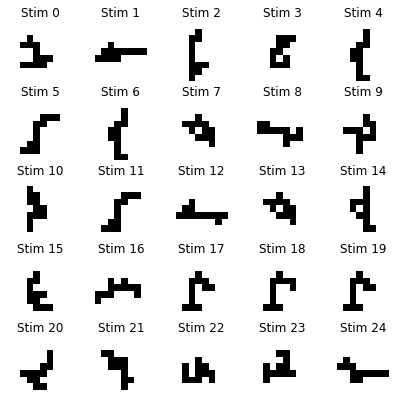

In [27]:
# plot a few stims
# plot_idx = np.sort(np.random.choice(n_sim,25,False))
plot_idx = np.arange(25)

plt.rcParams['figure.figsize'] = [7, 7]

if do_plot:
  mkPlot_subplots(final_Sil,plot_idx,10,'Stim ',5,5)

In [50]:
print(solutions.shape)
print(solutions.flatten().shape)

(150, 4)
(600,)


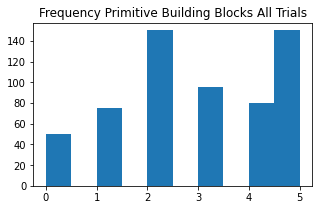

In [19]:
# histogram for building block distribution
plt.rcParams['figure.figsize'] = [5, 3]
if do_plot:
  plt.hist(solutions.flatten())
  plt.title('Frequency Primitive Building Blocks All Trials')
  plt.show()